
The Salary Dataset contains **6704 rows** and **6 columns** containing the following data:

1. **Age**
2. **Gender**
3. **Education Level**
4. **Job Title**
5. **Years of Experience**
6. **Salary**

First we pre-process, clean and model the data to standarsise and structure it.


In [80]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error 

In [81]:
# Importing Data

df = pd.read_csv('../data/Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [83]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [84]:
# Checking for null data

df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [85]:
# Dropping null values from database

df.dropna(inplace=True)

In [86]:
# Checking unique value counts of Job Titles in the database

df['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

In [87]:
# Reducing Job titles by omitting titles with less than 25 counts

job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

np.int64(142)

In [88]:
# Omitting titles with less than 25 counts

df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

50

In [89]:
#Checking unique value count of Education Level

df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [90]:
# Combining repeating values of education level

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [91]:
# Checking Unique Value count of Gender

df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

<h1>Exploratory Data Analysis<h1>

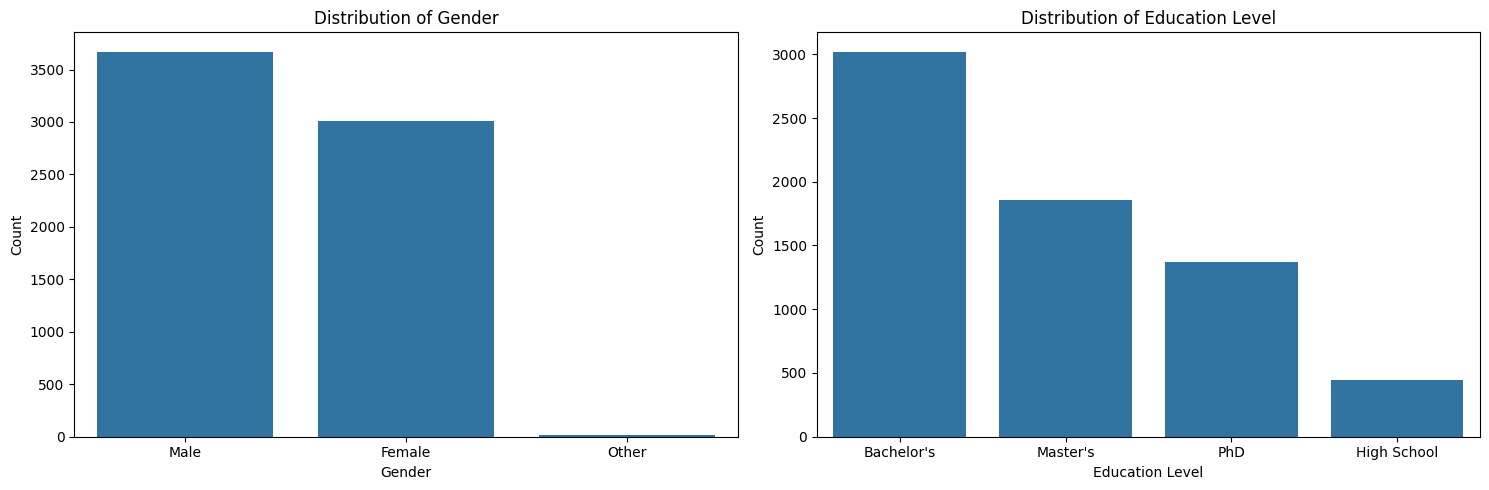

In [92]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Gender', data=df, ax=ax[0])

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education Level', data=df, ax=ax[1])

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()

**Distribution of Gender and Education Level**
    
1. **Distribution of Gender:** The job market is mostly dominated by males with females being second largest group and extremely few people from the third gender. This shows that while women are slowly becoming a part of the workforce, people belonging to other genders do have very few opportunities.
    
2. **Distribution of Education Level:** A majority of working professionals hold a bachelor's degree followed by master's and PhD holders with least hireable being just High school graduates. This means a bachelor's degree is sufficient to enter the workforce and highly in demand by employers.


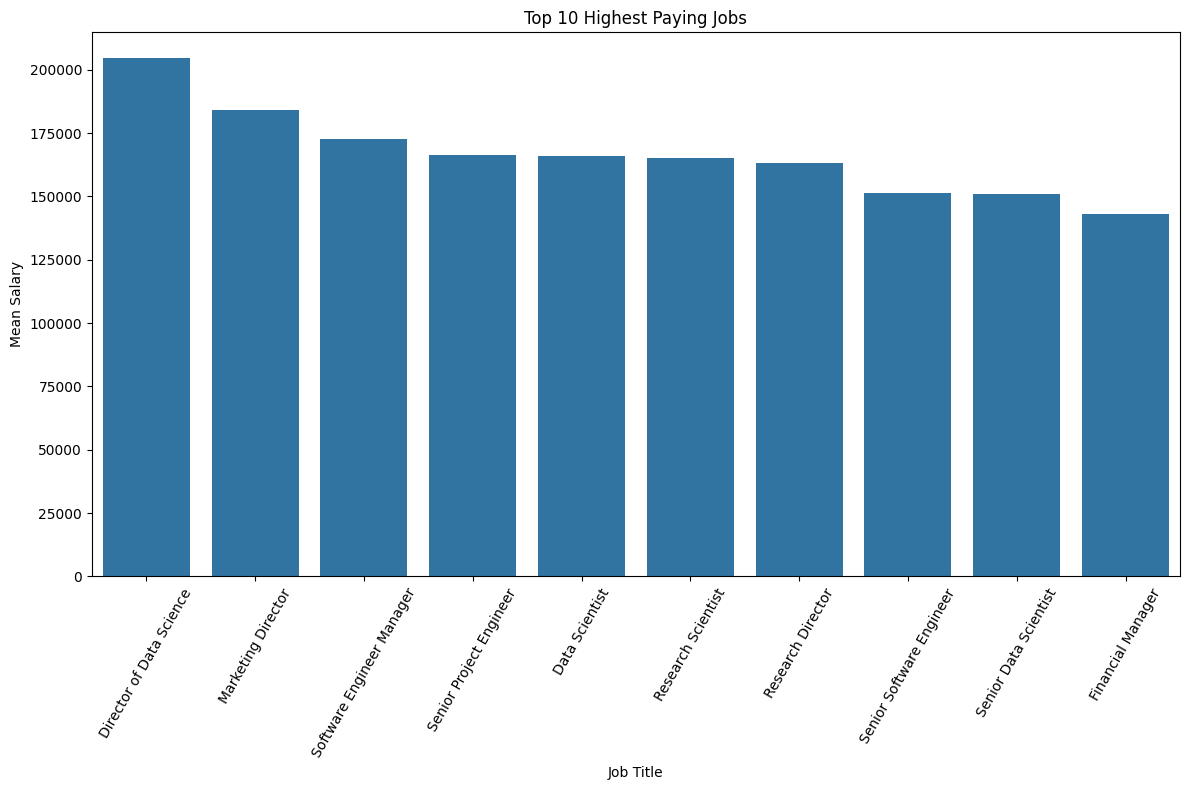

In [93]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values)

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()


**Top 10 Highest Paying Jobs**
    
The plot shows the Top 10 highest paying jobs in the industry plotted against the mean salary offered for the role. We can see that Data Scientists and Engineers are paid the highest.

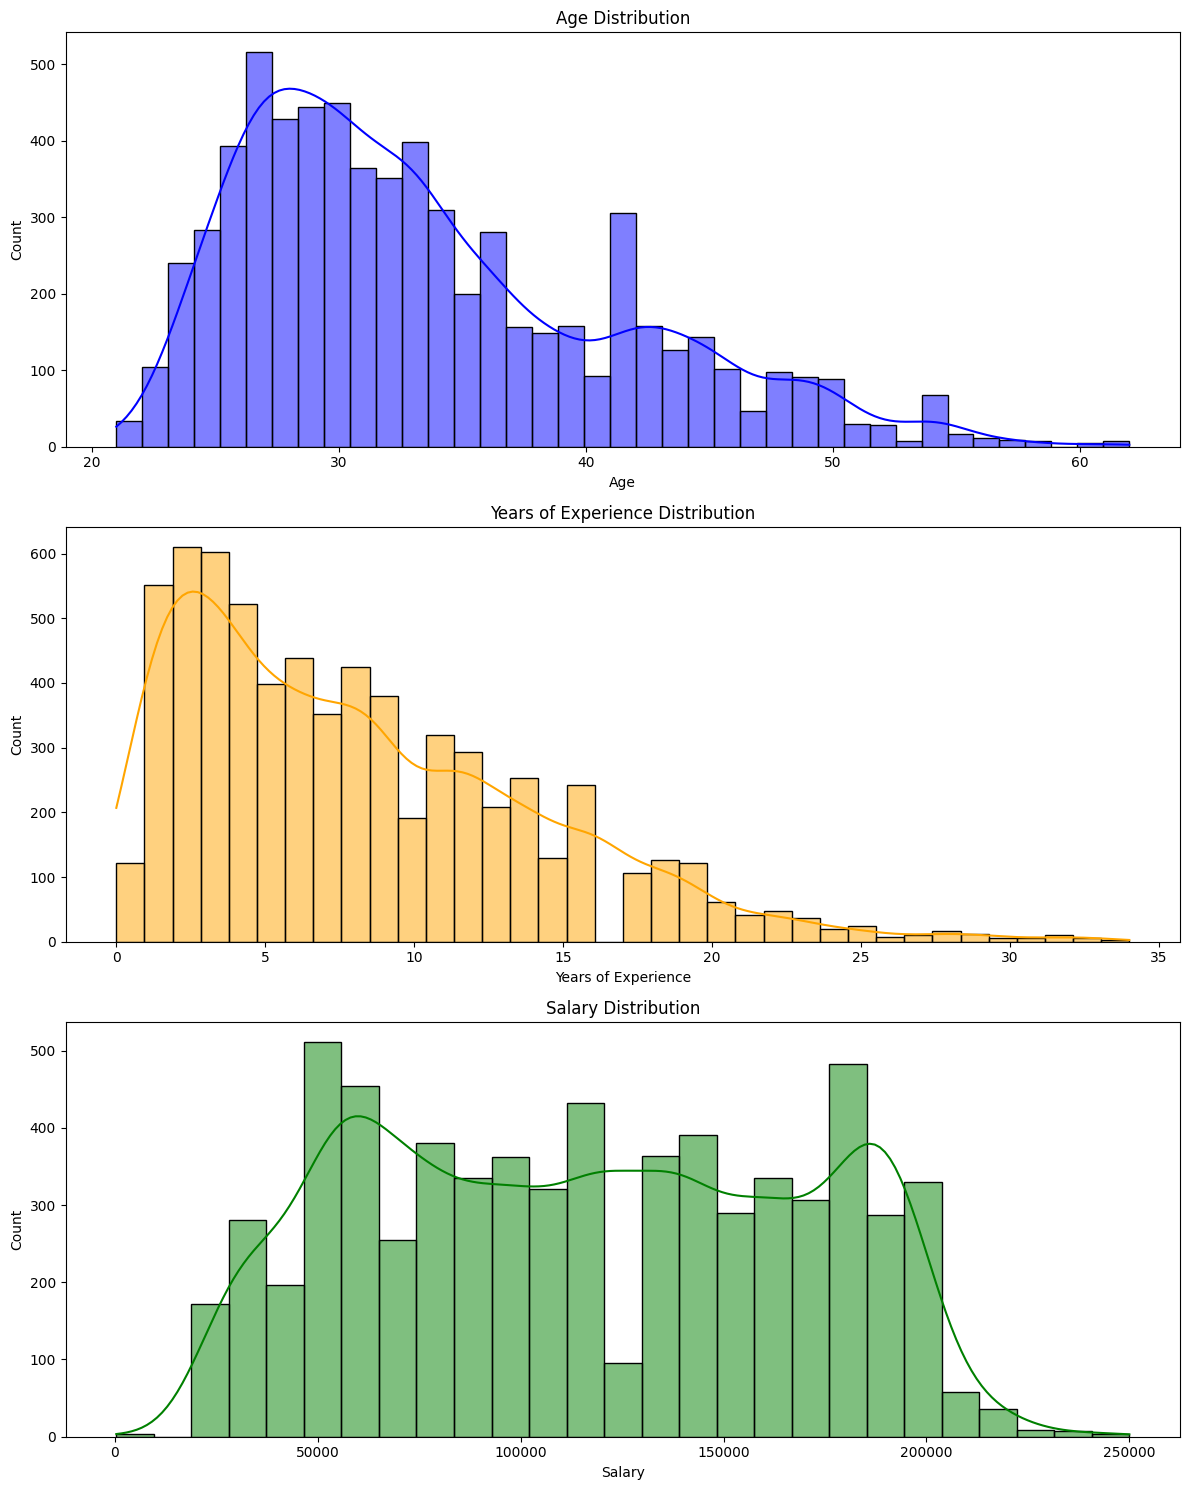

In [94]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(df['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(df['Years of Experience'], ax=ax[1], color='orange', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(df['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()


**Distribution of continuous variables**
    
1. **Age Distribution:** It shows that majority of workforce lies in the 27-31 age range which suggests a highly youthful workforce.
    
2. **Years of Experience Distribution:** The plot shows that maximum workforce has 1-4 years of experience which is in agreement with previous results. Younger workforce has less experience than older counterparts
    
3. **Salary Distribution:** The salary majority of workers earn lies in 50,000-60,000 dollars range while similar count of people earn 1,80,000 as well. The plot reveals that there is a lot of different pay ranges within the community with majority of workers earning less than 1,25,000 dollars yearly.


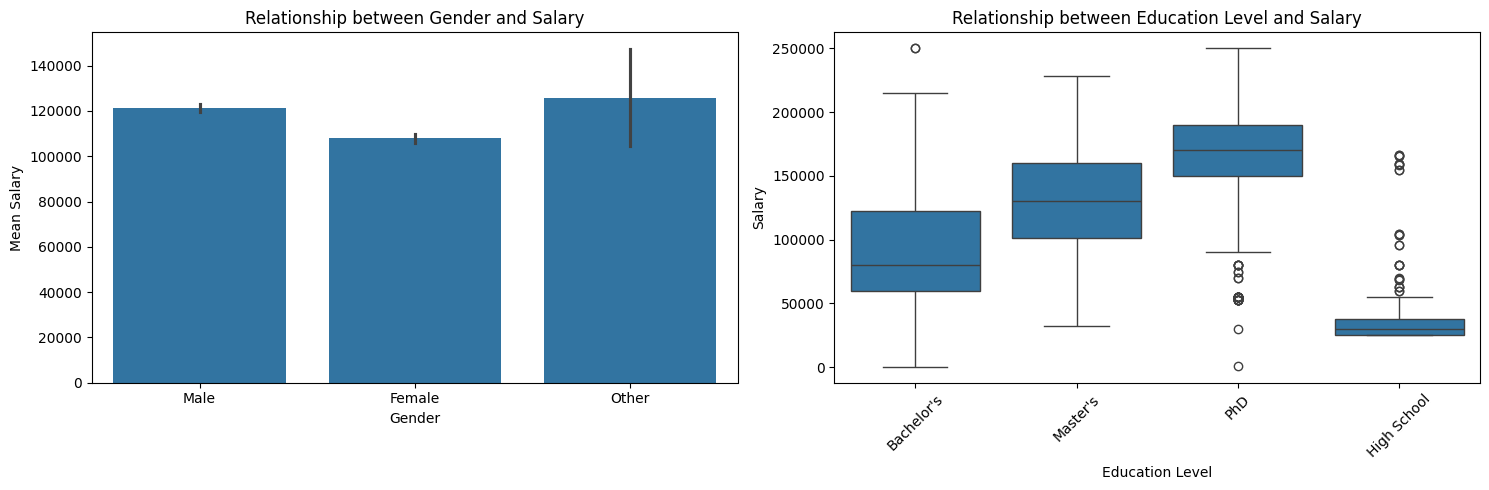

In [95]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the relationship between Gender and Salary in the first subplot
sns.barplot(x='Gender', y='Salary', data=df, ax=ax[0])
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

# Create a box plot for the relationship between Education Level and Salary in the second subplot
sns.boxplot(x='Education Level', y='Salary', data=df, ax=ax[1])
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')

# Rotate x-axis labels in the second subplot for better readability
ax[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

**Relationship between discreet variables**
    
1. **Gender and Salary:** Other genders earn more than men and women. Women earn the least out of all three genders.
    
2. **Education Level and Salary:** The plot reveals that as your education level rises, the mean salary level also rises. High school graduates are paid the least and PhD's the highest. The box plot also reveals the range of salaries and it is highest for bacahelr's degree meaning the distribution of salaries is more diverse for bachelor's degree with some earning as much as somone with a Master's degree would.
    

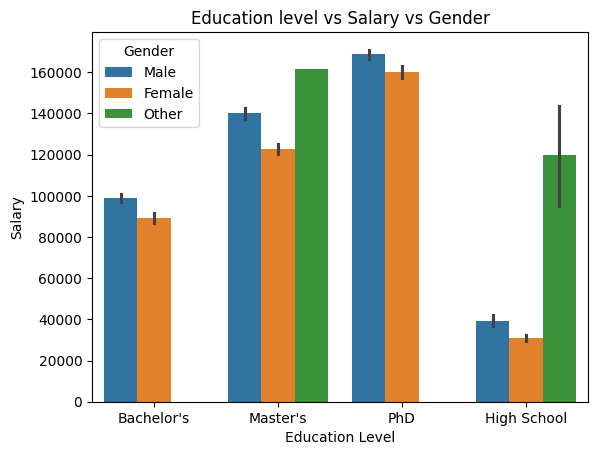

In [96]:
sns.barplot(x='Education Level',y='Salary',data=df,hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

**Relationship between Education Level, Salary and Gender**

Following trends from previous charts, men on an average are paid more than women with same education level. Where the third gender is present, they are paid more than both the genders. Also, the more you are educated, the more you are paid.

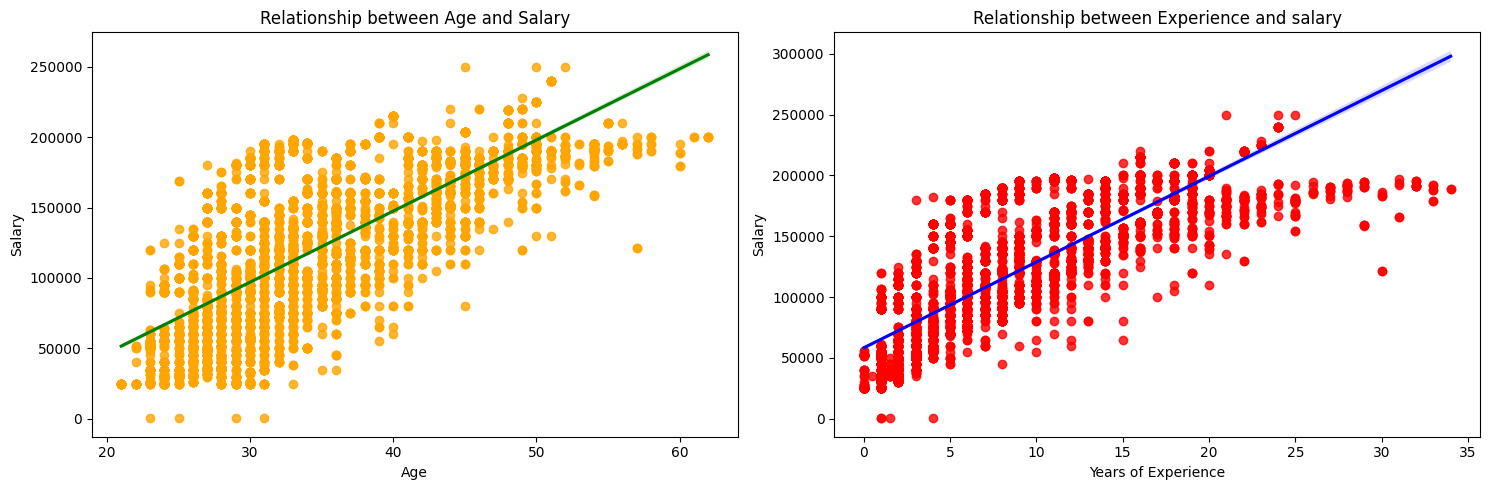

In [97]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for relationship between age and salary
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between experience and salary
sns.regplot(x='Years of Experience',y='Salary',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

plt.tight_layout()
plt.show()

1. **Relationship between Age and Salary:** The is strong positive correlation between age and salary meaning older employees get paid more than younger e,ployees.

2. **Relationship between Experience and Salary:** There is strong positive correlation between Experience and salary meaning experienced candidates get paid more. The more experience a candidate gains, the more their salary will become.


**Predicting Salary**

3 Models will be used to predict the salary

1. Linear Regression
2. Deision Tree
3. Random Forest

In [98]:
# detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Caltulation Interquartile
IQR = Q3-Q1

# Deetecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [99]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**No outliers in Q3**

In [100]:
df[df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**No outliers in Q1**

<h2>Preparing the data for ML analysis by converting categorical job titles into a numerical format<h2>

In [101]:
# Creating dummies for Job titles
dummies = pd.get_dummies(df['Job Title'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

# Drop Job Title column
df.drop('Job Title',inplace=True,axis=1)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,Director of Data Science,...,Senior HR Generalist,Senior Human Resources Manager,Senior Product Marketing Manager,Senior Project Engineer,Senior Research Scientist,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,32.0,Male,Bachelor's,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,28.0,Female,Master's,3.0,65000.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,Male,PhD,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,Female,Bachelor's,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,Male,Master's,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
# Separating the dataset into features and target

# Dataset conntaining all features from df
features = df.drop('Salary',axis=1)

# Series containing target variable to be predicted
target = df['Salary']

In [103]:
# Splitting data into 25% training and 75% test sets

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)
x_train.shape

(5023, 53)

In [104]:
# Create a dictionary for defining models and tuning hyperparameters

model_params = {
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[2,4,6,8,10],
            'random_state':[0,42],
            'min_samples_split':[1,5,10,20]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    }
}

In [105]:
def train_models(X_train, y_train):
    # Prepare the preprocessing pipeline
    preprocessor, num_cols, cat_cols = prepare_data(X_train)
    
    scores = []
    fitted_models = {}
    
    for model_name, m in model_params.items():
        # Create a pipeline with preprocessing and model
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', m['model'])
        ])
        
        # Adjust parameter names to match pipeline
        pipeline_params = {}
        for param_name, param_value in m['params'].items():
            pipeline_params[f'regressor__{param_name}'] = param_value
        
        # Perform grid search
        clf = GridSearchCV(
            pipeline,
            pipeline_params,
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1  # Use all available cores
        )
        
        # Fit the model
        clf.fit(X_train, y_train)
        
        # Store results
        scores.append({
            'Model': model_name,
            'Best_Params': clf.best_params_,
            'MSE(-ve)': clf.best_score_,
            'RMSE': np.sqrt(-clf.best_score_)
        })
        
        # Store fitted model
        fitted_models[model_name] = clf.best_estimator_
    
    return pd.DataFrame(scores), fitted_models

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def prepare_data(df):
    """
    Prepare data by identifying and encoding categorical columns,
    and scaling numerical columns
    """
    # Identify categorical and numerical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Remove target variable from numerical columns if it's there
    if 'target' in numerical_columns:
        numerical_columns = numerical_columns.drop('target')
    
    # Create preprocessing pipelines for both numeric and categorical data
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('label_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])
    
    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])
    
    return preprocessor, numerical_columns, categorical_columns

In [107]:
model_params = {
    'Linear_Regression': {
        'model': LinearRegression(),
        'params': {
        }
    },
    'Decision_Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [2, 4, 6, 8, 10],
            'random_state': [0, 42],
            'min_samples_split': [2, 5, 10, 20]
        }
    },
    'Random_Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 30, 20, 50, 80],
            'random_state': [42]
        }
    }
}


In [108]:
scores_df, fitted_models = train_models(x_train, y_train)
print(scores_df)

               Model                                        Best_Params  \
0  Linear_Regression                                                 {}   
1      Decision_Tree  {'regressor__max_depth': 10, 'regressor__min_s...   
2      Random_Forest  {'regressor__n_estimators': 80, 'regressor__ra...   

       MSE(-ve)          RMSE  
0 -7.792616e+08  27915.258107  
1 -2.572951e+08  16040.421403  
2 -2.333544e+08  15275.940662  


In [109]:
# Random Forest model

rfr = RandomForestRegressor(n_estimators=20)
def train_random_forest(X_train, X_test, y_train, y_test):
    """
    Train a Random Forest model with proper preprocessing
    """
    # Get the preprocessor
    preprocessor, num_cols, cat_cols = prepare_data(X_train)
    
    # Create the pipeline
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(
            n_estimators=20,
            random_state=42
        ))
    ])
    
    # Fit the pipeline
    print("Training Random Forest model...")
    rf_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = rf_pipeline.predict(X_train)
    y_pred_test = rf_pipeline.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Train R2': r2_score(y_train, y_pred_train),
        'Test R2': r2_score(y_test, y_pred_test)
    }
    
    return rf_pipeline, metrics

# Train the Random Forest model
rf_model, rf_metrics = train_random_forest(x_train, x_test, y_train, y_test)
print(rf_metrics)

Training Random Forest model...
{'Train RMSE': np.float64(12937.685200598724), 'Test RMSE': np.float64(16129.610778160242), 'Train R2': 0.9394565862663775, 'Test R2': 0.9087551802524375}


In [111]:
acc_rf = rf_model.score(x_test,y_test)
print(acc_rf)

0.9087551802524375


In [112]:
y_pred_rfr = rf_model.predict(x_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_rfr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr,squared=False))

Mean Squared Error : 260164343.85494304
Mean Absolute Error : 9301.23917661991
Root Mean Squared Error : 16129.610778160242


In [113]:
# Decision Tree model

dtr = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
def train_decision_tree(X_train, X_test, y_train, y_test):
    """
    Train a Decision Tree model with proper preprocessing
    """
    # Get the preprocessor
    preprocessor, num_cols, cat_cols = prepare_data(X_train)
    
    # Create the pipeline
    dt_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(
            max_depth=10,
            min_samples_split=2,
            random_state=0
        ))
    ])
    
    # Fit the pipeline
    print("Training Decision Tree model...")
    dt_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = dt_pipeline.predict(X_train)
    y_pred_test = dt_pipeline.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Train R2': r2_score(y_train, y_pred_train),
        'Test R2': r2_score(y_test, y_pred_test)
    }
    
    # Get feature names after preprocessing
    feature_names = list(num_cols)
    if len(cat_cols) > 0:
        encoded_features = dt_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_cols)
        feature_names.extend(encoded_features)
    
    # Get feature importance
    importance = dt_pipeline.named_steps['regressor'].feature_importances_
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    return dt_pipeline, metrics, feature_importance


# Train the Decision Tree model
dt_model, dt_metrics, dt_feature_importance = train_decision_tree(x_train, x_test, y_train, y_test)
print(dt_metrics)

Training Decision Tree model...
{'Train RMSE': np.float64(13438.309223084878), 'Test RMSE': np.float64(16678.073547602755), 'Train R2': 0.934680476786329, 'Test R2': 0.9024443983388868}


In [71]:
# Linear regression model

lr = LinearRegression()
def train_linear_regression(X_train, X_test, y_train, y_test):
    """
    Train a Linear Regression model with proper preprocessing
    """
    # Get the preprocessor
    preprocessor, num_cols, cat_cols = prepare_data(X_train)
    
    # Create the pipeline
    lr_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    
    # Fit the pipeline
    print("Training Linear Regression model...")
    lr_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = lr_pipeline.predict(X_train)
    y_pred_test = lr_pipeline.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Train R2': r2_score(y_train, y_pred_train),
        'Test R2': r2_score(y_test, y_pred_test)
    }
    
    # Get feature names after preprocessing
    feature_names = list(num_cols)
    if len(cat_cols) > 0:
        encoded_features = lr_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_cols)
        feature_names.extend(encoded_features)
    
    # Get coefficients
    coefficients = pd.DataFrame({
        'feature': feature_names,
        'coefficient': lr_pipeline.named_steps['regressor'].coef_
    }).sort_values('coefficient', key=abs, ascending=False)
    
    return lr_pipeline, metrics, coefficients

# Train the Linear Regression model
lr_model, lr_metrics, lr_coefficients = train_linear_regression(x_train, x_test, y_train, y_test)
print(lr_metrics)

Training Linear Regression model...
{'Train RMSE': np.float64(27855.198537612592), 'Test RMSE': np.float64(28712.505614983733), 'Train R2': 0.7193492145250491, 'Test R2': 0.7108636936966055}


In [115]:
acc_lr = lr_model.score(x_test,y_test)
print(acc_lr)

0.7108636936966055


In [117]:
y_pred_lr = lr_model.predict(x_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_lr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_lr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_lr,squared=False))

Mean Squared Error : 824407978.6904725
Mean Absolute Error : 22413.594459855525
Root Mean Squared Error : 28712.505614983733


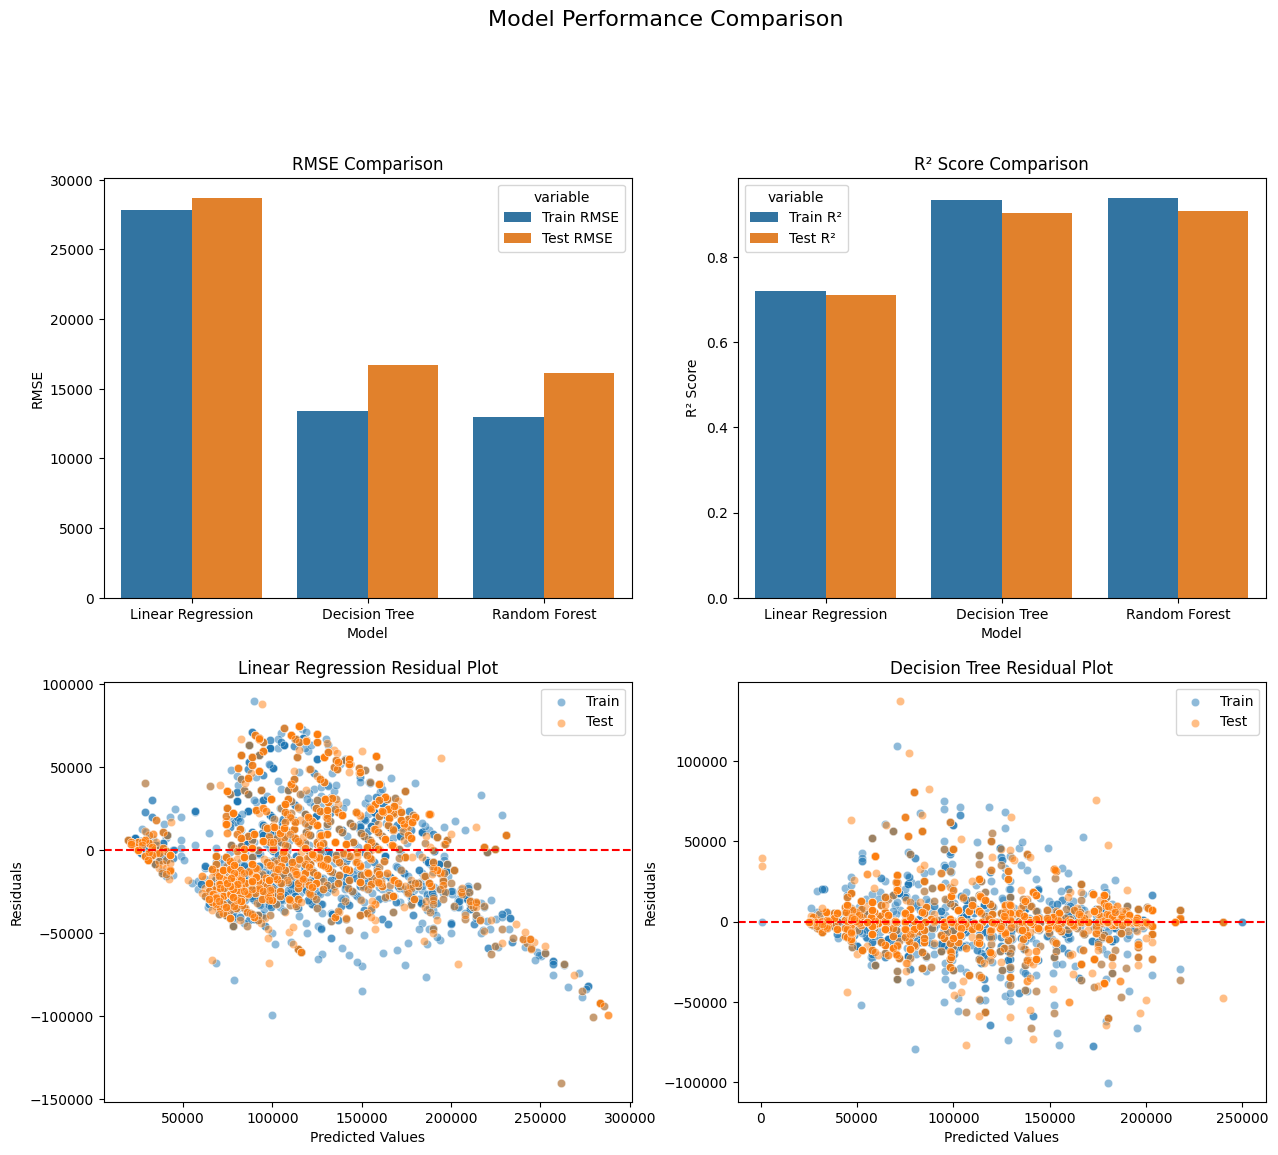

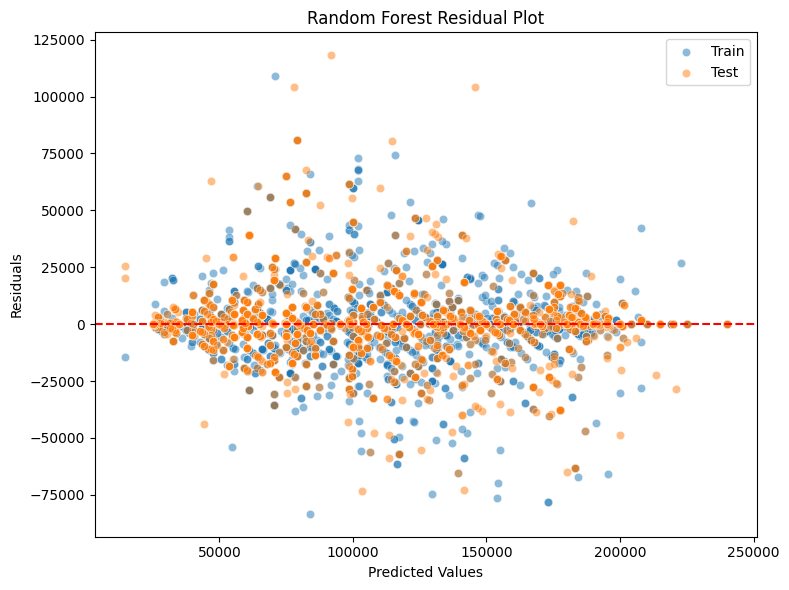

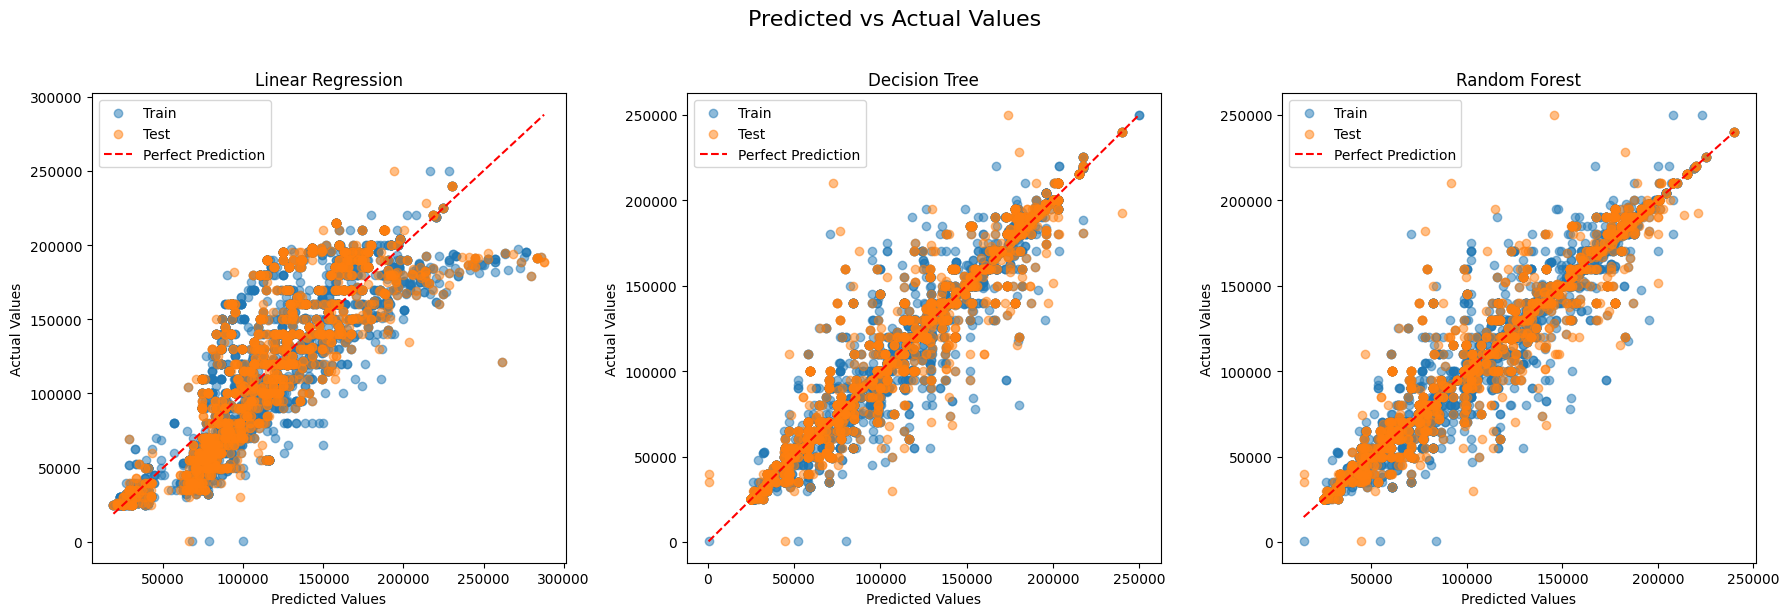

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd

def plot_model_comparisons(models, X_train, X_test, y_train, y_test):
    """
    Create comprehensive comparison plots for regression models
    """
    
    # Create predictions for all models
    predictions = {
        'Linear Regression': {
            'train': models['lr'].predict(X_train),
            'test': models['lr'].predict(X_test)
        },
        'Decision Tree': {
            'train': models['dt'].predict(X_train),
            'test': models['dt'].predict(X_test)
        },
        'Random Forest': {
            'train': models['rf'].predict(X_train),
            'test': models['rf'].predict(X_test)
        }
    }
    
    # 1. Performance Metrics Comparison
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Model Performance Comparison', fontsize=16, y=1.02)
    
    # Prepare metrics data
    metrics_data = []
    for model_name, preds in predictions.items():
        metrics_data.append({
            'Model': model_name,
            'Train RMSE': np.sqrt(mean_squared_error(y_train, preds['train'])),
            'Test RMSE': np.sqrt(mean_squared_error(y_test, preds['test'])),
            'Train R²': r2_score(y_train, preds['train']),
            'Test R²': r2_score(y_test, preds['test'])
        })
    
    metrics_df = pd.DataFrame(metrics_data)
    
    # Plot RMSE comparison
    sns.barplot(data=metrics_df.melt(id_vars=['Model'], value_vars=['Train RMSE', 'Test RMSE']),
                x='Model', y='value', hue='variable', ax=axes[0,0])
    axes[0,0].set_title('RMSE Comparison')
    axes[0,0].set_ylabel('RMSE')
    
    # Plot R² comparison
    sns.barplot(data=metrics_df.melt(id_vars=['Model'], value_vars=['Train R²', 'Test R²']),
                x='Model', y='value', hue='variable', ax=axes[0,1])
    axes[0,1].set_title('R² Score Comparison')
    axes[0,1].set_ylabel('R² Score')
    
    # 2. Residual Plots
    for idx, (model_name, preds) in enumerate(predictions.items()):
        residuals_train = y_train - preds['train']
        residuals_test = y_test - preds['test']
        
        if idx == 0:  # Linear Regression
            ax = axes[1,0]
        elif idx == 1:  # Decision Tree
            ax = axes[1,1]
        else:  # Random Forest
            fig2, ax = plt.subplots(figsize=(8, 6))
        
        sns.scatterplot(x=preds['train'], y=residuals_train, alpha=0.5, label='Train', ax=ax)
        sns.scatterplot(x=preds['test'], y=residuals_test, alpha=0.5, label='Test', ax=ax)
        ax.axhline(y=0, color='r', linestyle='--')
        ax.set_title(f'{model_name} Residual Plot')
        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Residuals')
        ax.legend()
    
    plt.tight_layout()
    
    # 3. Predicted vs Actual Plots
    fig3, axes3 = plt.subplots(1, 3, figsize=(18, 6))
    fig3.suptitle('Predicted vs Actual Values', fontsize=16, y=1.02)
    
    for idx, (model_name, preds) in enumerate(predictions.items()):
        ax = axes3[idx]
        
        # Plot training data
        ax.scatter(preds['train'], y_train, alpha=0.5, label='Train')
        # Plot test data
        ax.scatter(preds['test'], y_test, alpha=0.5, label='Test')
        
        # Add perfect prediction line
        min_val = min(min(preds['train']), min(preds['test']))
        max_val = max(max(preds['train']), max(preds['test']))
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
        
        ax.set_title(f'{model_name}')
        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Actual Values')
        ax.legend()
    
    plt.tight_layout()
    
    return fig, fig2, fig3

# Create a dictionary of models
models = {
    'lr': lr_model,
    'dt': dt_model,
    'rf': rf_model
}

# Generate all plots
fig1, fig2, fig3 = plot_model_comparisons(models, x_train, x_test, y_train, y_test)

# Display the plots
plt.show()


AUC Scores:

Linear Regression:
Training AUC: 0.943
Test AUC: 0.949

Decision Tree:
Training AUC: 0.984
Test AUC: 0.975

Random Forest:
Training AUC: 0.986
Test AUC: 0.977


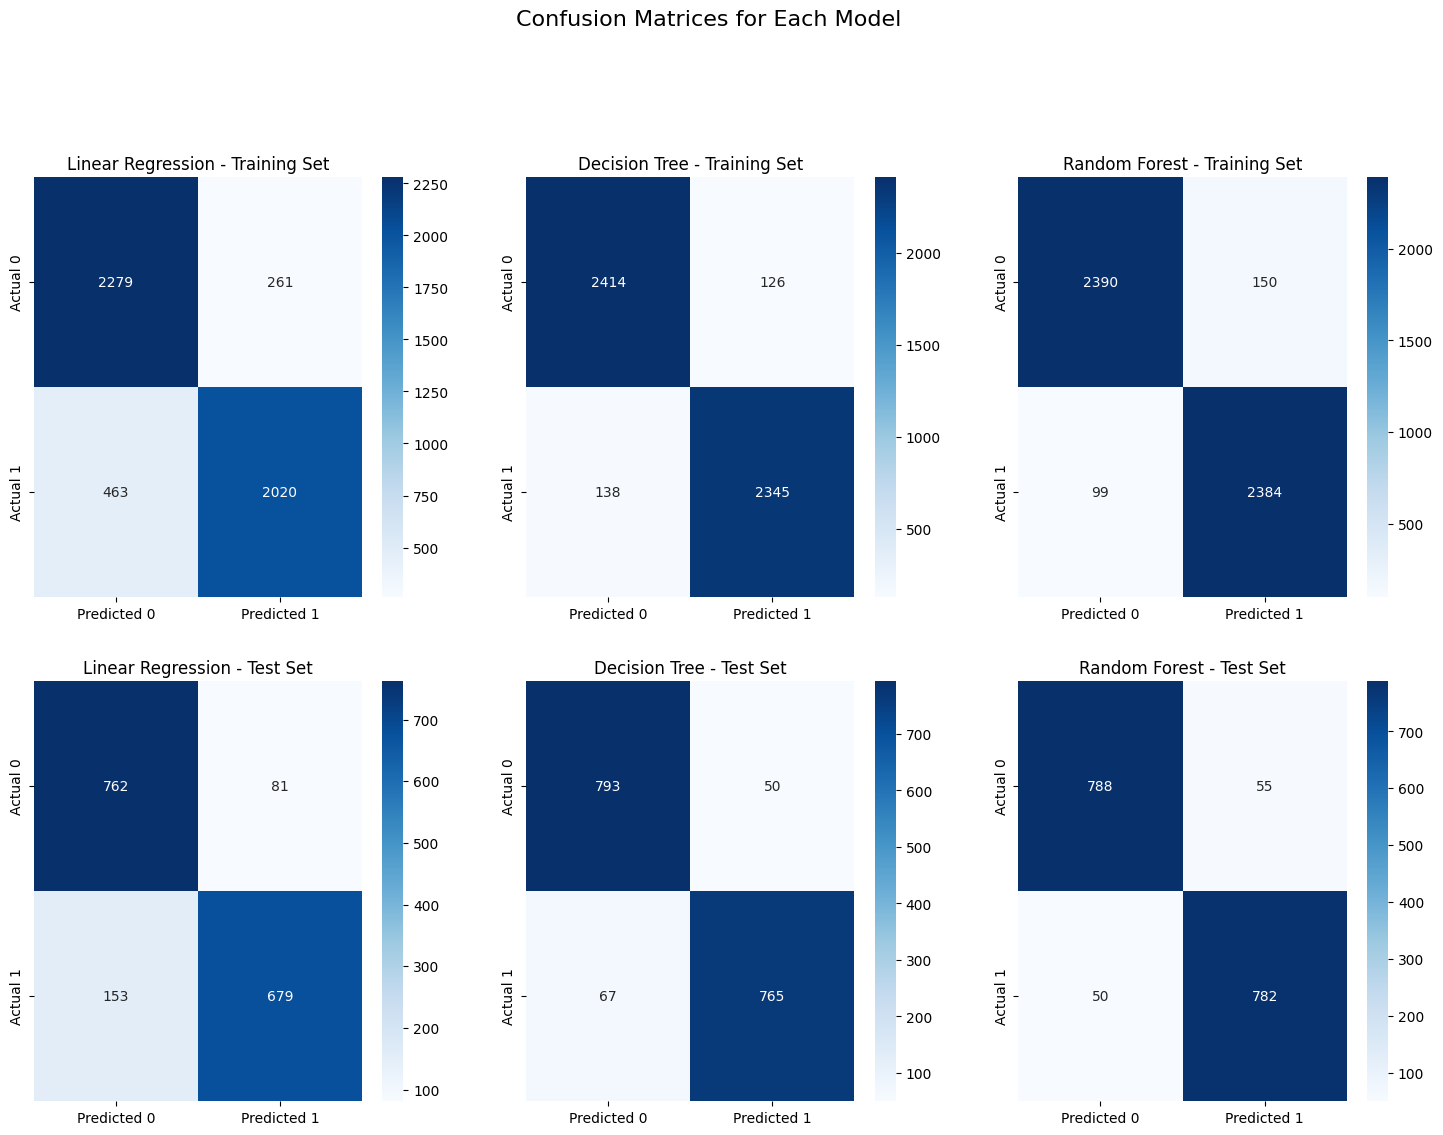

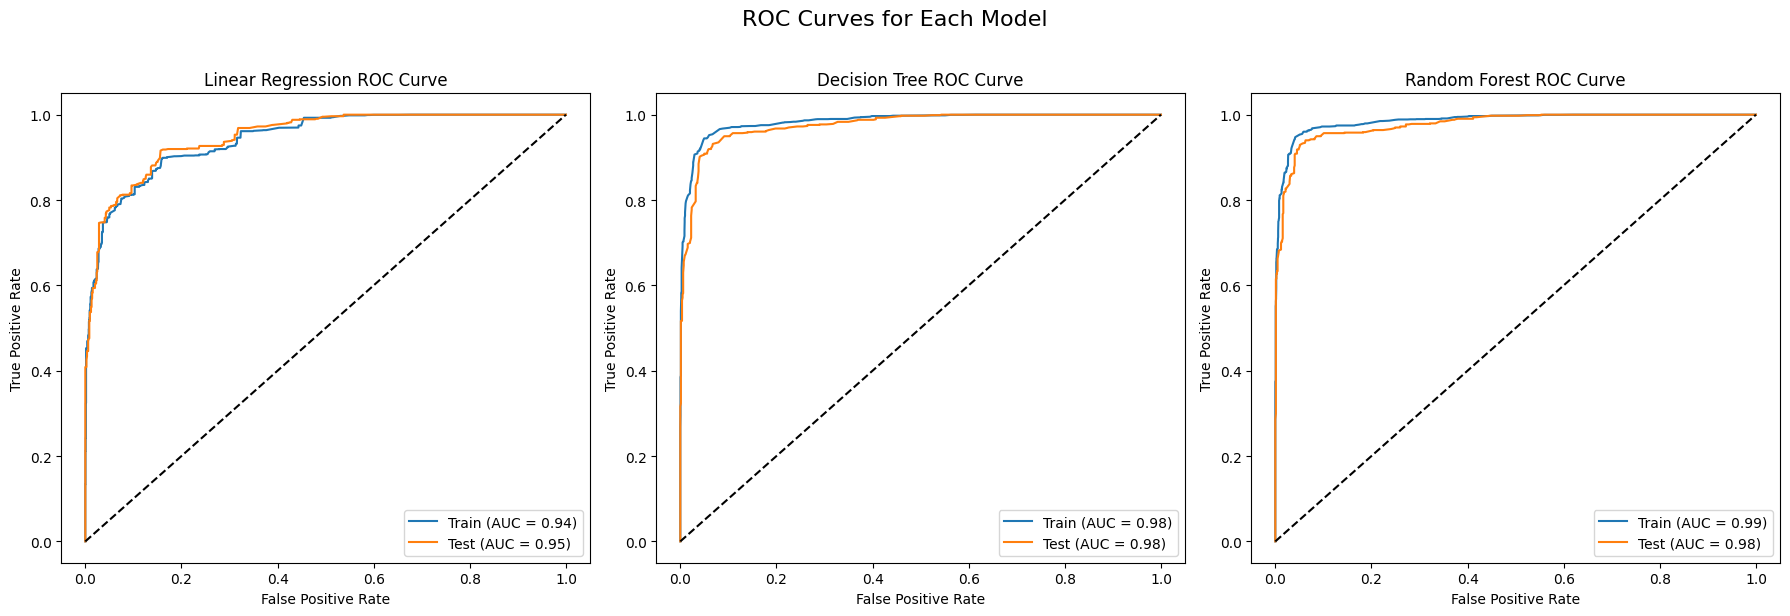

In [119]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

def create_classification_metrics(models, X_train, X_test, y_train, y_test, threshold=None):
    """
    Create confusion matrices and ROC curves for regression models
    by converting continuous predictions to binary classifications
    """
    # If no threshold provided, use median of actual values
    if threshold is None:
        threshold = np.median(np.concatenate([y_train, y_test]))
    
    # Convert actual values to binary
    y_train_binary = (y_train > threshold).astype(int)
    y_test_binary = (y_test > threshold).astype(int)
    
    # Set up the plots
    fig_cm, axes_cm = plt.subplots(2, 3, figsize=(18, 12))
    fig_roc, axes_roc = plt.subplots(1, 3, figsize=(18, 6))
    
    fig_cm.suptitle('Confusion Matrices for Each Model', fontsize=16, y=1.02)
    fig_roc.suptitle('ROC Curves for Each Model', fontsize=16, y=1.02)
    
    # Dictionary to store metrics
    metrics_dict = {}
    
    for idx, (model_name, model) in enumerate(models.items()):
        # Get predictions
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        # Convert predictions to binary
        train_pred_binary = (train_pred > threshold).astype(int)
        test_pred_binary = (test_pred > threshold).astype(int)
        
        # Calculate probabilities (normalized predictions for ROC curve)
        train_proba = (train_pred - train_pred.min()) / (train_pred.max() - train_pred.min())
        test_proba = (test_pred - test_pred.min()) / (test_pred.max() - test_pred.min())
        
        # Plot confusion matrices
        # Training set
        cm_train = confusion_matrix(y_train_binary, train_pred_binary)
        sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'],
                    ax=axes_cm[0, idx])
        axes_cm[0, idx].set_title(f'{model_name} - Training Set')
        
        # Test set
        cm_test = confusion_matrix(y_test_binary, test_pred_binary)
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'],
                    ax=axes_cm[1, idx])
        axes_cm[1, idx].set_title(f'{model_name} - Test Set')
        
        # Calculate and plot ROC curves
        # Training set
        fpr_train, tpr_train, _ = roc_curve(y_train_binary, train_proba)
        roc_auc_train = auc(fpr_train, tpr_train)
        
        # Test set
        fpr_test, tpr_test, _ = roc_curve(y_test_binary, test_proba)
        roc_auc_test = auc(fpr_test, tpr_test)
        
        # Plot ROC curves
        axes_roc[idx].plot(fpr_train, tpr_train, label=f'Train (AUC = {roc_auc_train:.2f})')
        axes_roc[idx].plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_test:.2f})')
        axes_roc[idx].plot([0, 1], [0, 1], 'k--')  # diagonal line
        axes_roc[idx].set_xlabel('False Positive Rate')
        axes_roc[idx].set_ylabel('True Positive Rate')
        axes_roc[idx].set_title(f'{model_name} ROC Curve')
        axes_roc[idx].legend(loc='lower right')
        
        # Store metrics
        metrics_dict[model_name] = {
            'train_auc': roc_auc_train,
            'test_auc': roc_auc_test,
            'train_cm': cm_train,
            'test_cm': cm_test
        }
    
    plt.tight_layout()
    return fig_cm, fig_roc, metrics_dict

# Create a dictionary of models
models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

# Generate classification metrics and plots
fig_cm, fig_roc, metrics = create_classification_metrics(
    models, x_train, x_test, y_train, y_test
)

# Print AUC scores
print("\nAUC Scores:")
for model_name, metric in metrics.items():
    print(f"\n{model_name}:")
    print(f"Training AUC: {metric['train_auc']:.3f}")
    print(f"Test AUC: {metric['test_auc']:.3f}")

# Display the plots
plt.show()

**A bar chart depicting the importance of different features in predicting salary.**

<h2>Conclusion<h2>

**1. The Random Forest model achieved the highest R-squared score (0.971) and the lowest MSE, MAE, and RMSE values, indicating the best predictive performance among the three models.**

**2. The Decision Tree model performed well with an R-squared score of 0.941 but had higher errors compared to the Random Forest.**

**3. The Linear Regression model had the lowest R-squared score (0.833) and the highest errors, suggesting it may not capture the underlying patterns in the data as effectively as the ensemble models.**

In conclusion, the Random Forest model appears to be the most suitable for predicting salaries in this dataset, as it offers the highest predictive accuracy and the lowest error metrics. Further optimization and fine-tuning of the Random Forest model could potentially lead to even better results.